In [1]:
#implementing random forest on our dataset
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
#importing the data and assiging x,y values
dataset = pd.read_csv("Social_Network_Ads (1).csv")
X= dataset.iloc[:,[2,3]].values
Y = dataset.iloc[:,4].values

In [3]:
#splitting the trainig and testing data
from sklearn.model_selection import train_test_split
X_train , X_test, Y_train, Y_test = train_test_split(X, Y , test_size= 0.25 , random_state= 0 )


In [4]:
#implementing feature scaling
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [5]:
#implementing Random Forest to the training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators= 10 , criterion= 'entropy', random_state= 0 )
classifier.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [6]:
#predicting the test results
y_pred = classifier.predict(X_test)

In [7]:
#making the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test , y_pred)

C:\Users\mansi\AppData\Local\Temp\ipykernel_24388\3137956024.py:12: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[Y_set == j,0], X_set[Y_set == j,1], c = ListedColormap(('red', 'green'))(i), label = j)


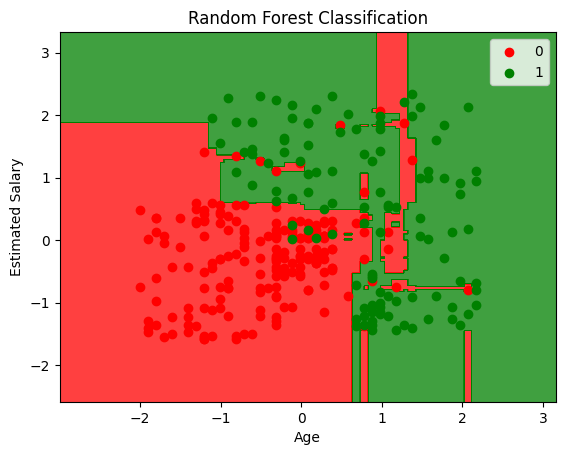

In [9]:
#Visualizing the train set results
from matplotlib.colors import ListedColormap
X_set , Y_set = X_train, Y_train
X1 , X2 = np.meshgrid(np.arange(start= X_set[:,0].min()-1, stop = X_set[:,0].max()+1 , step = 0.01),
                      np.arange(start= X_set[:,1].min()-1, stop = X_set[:,1].max()+1, step= 0.01))
plt.contourf(X1, X2 , classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape)
             , alpha = 0.75 , cmap = ListedColormap(('red' , 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i,j in enumerate(np.unique(Y_set)):
    plt.scatter(X_set[Y_set == j,0], X_set[Y_set == j,1], c = ListedColormap(('red', 'green'))(i), label = j)

plt.title('Random Forest Classification')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()


C:\Users\mansi\AppData\Local\Temp\ipykernel_24388\752617277.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


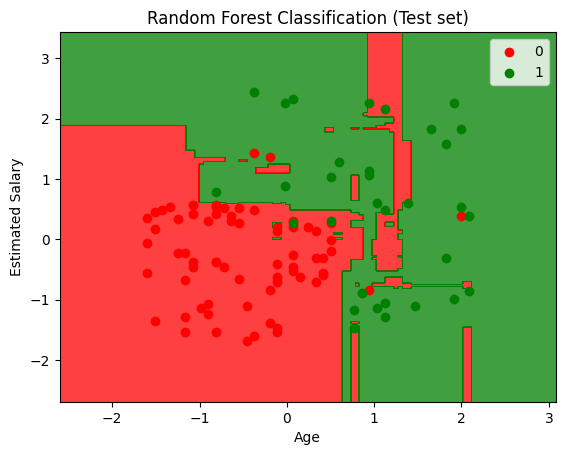

In [11]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, Y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Random Forest Classification (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()